<a href="https://colab.research.google.com/github/rakibul-24/Home-Cleaning-Services_Analysis_Notebook.ipynb/blob/main/Home_Cleaning_Services_Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##import library


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


##load data

In [ ]:
df = pd.read_csv('/content/Home Cleaning Services_Analysis_Notebook.csv.csv')
output = []
output.append("Exploratory Data Analysis of Home Cleaning Services_Analysis\n")
output.append("=========================\n")
print(output)

['Exploratory Data Analysis of Home Cleaning Services_Analysis\n', '=========================\n']


##explore data

In [ ]:
print(df.head())
output.append(f"First few rows:\n{df.head()}\n")

         Date         Product Region Customer_Type  Quantity   Price  \
0  2024-03-08  Tennis Rackets   West  Recreational         7  207.38   
1  2024-02-27         Weights   East  Recreational         2  176.35   
2  2024-03-10         Weights   East  Recreational         4  764.49   
3  2024-08-03  Tennis Rackets  North  Recreational        10  634.00   
4  2024-10-28  Tennis Rackets  South       Athlete        10  796.59   

   Discount  Revenue  
0      0.11  1291.98  
1      0.01   349.17  
2      0.22  2385.21  
3      0.25  4755.00  
4      0.19  6452.38  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price          1000 non-null   float64
 6   Discount       1000 non-null   float64
 7   Revenue        1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


In [ ]:
df.describe()

,Quantity,Price,Discount,Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,10.565000,510.776680,0.151220,4601.976380
std,5.707219,291.985691,0.083953,3970.298521
min,1.000000,11.360000,0.000000,27.740000
25%,6.000000,250.230000,0.080000,1316.647500
50%,10.000000,524.240000,0.150000,3332.420000
75%,16.000000,766.255000,0.220000,6978.920000
max,20.000000,999.440000,0.300000,17210.670000


##Clean and Data

In [ ]:
output.append("Data Cleaning Result:\n")
missing_values=df.isnull().sum()
print(missing_values)
output.append(f"Missing Values:\n{missing_values}\n")
df.dropna(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

Date             0
Product          0
Region           0
Customer_Type    0
Quantity         0
Price            0
Discount         0
Revenue          0
dtype: int64


##Delete rows delete

In [ ]:
# Check for duplicates and count them
duplicates = df.duplicated().sum()
output.append(f"Number of Duplicates Dropped: {duplicates}\n")
# Drop duplicate rows
df.drop_duplicates(inplace=True)


##Analysis the data

In [ ]:
# Calculate the total revenue by summing the 'Price' column
total_revenue = df['Revenue'].sum()

# Append the total revenue to the output list
output.append(f'Total Revenue: ${total_revenue}\n')

# Print the total revenue
print(f'Total Revenue: ${total_revenue}')

Total Revenue: $4601976.38


In [ ]:
average_price_per_service = df.groupby('Customer_Type')['Price'].mean()
output.append(f"(Average Price per Customer Type:\n")
output.append("average_price_per_service)\n")
print(average_price_per_service)

Customer_Type
Athlete         527.129785
Recreational    493.687853
Name: Price, dtype: float64


In [ ]:
# Count the total services provided by each region
total_services_by_region = df['Region'].value_counts()

# Append the result to the output list
output.append("Total Services Provided by Region:\n")
output.append(f"{total_services_by_region}\n")

# Print the result
print("Total Services Provided by Region:\n", total_services_by_region)

Total Services Provided by Region:
 Region
West     271
North    252
East     245
South    232
Name: count, dtype: int64


In [ ]:
# Calculate the total revenue by region
total_revenue_by_region = df.groupby('Region')['Price'].sum()

# Append the result to the output list
output.append("Total Revenue by Region:\n")
output.append(f"{total_revenue_by_region}\n")

# Print the result
print("Total Revenue by Region:\n", total_revenue_by_region)

Total Revenue by Region:
 Region
East     117467.42
North    123555.38
South    122848.54
West     146905.34
Name: Price, dtype: float64


##Visualize the data

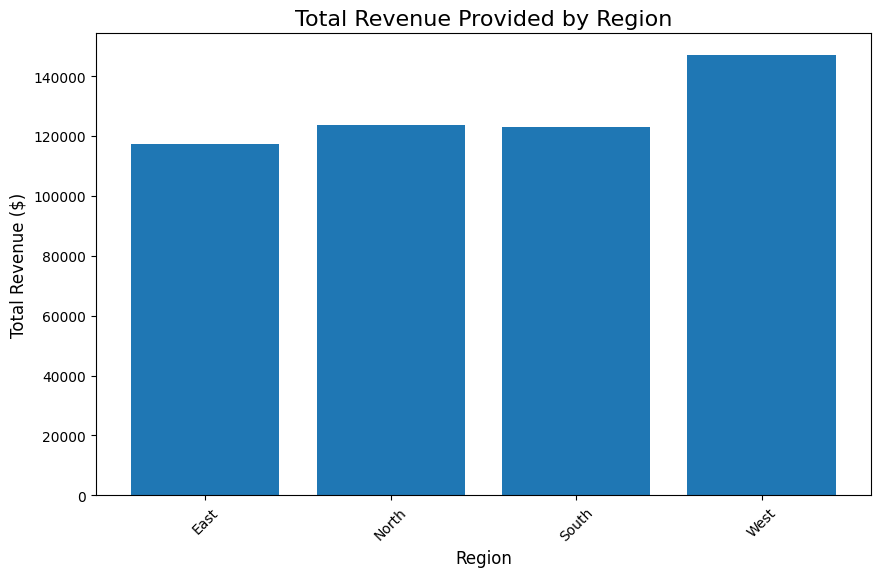

In [ ]:
# plt.figure(figsize=(10,6))
# plt.bar(total_revenue_by_region.index,total_revenue_by_region.values)
# plt.tittle('Total Services Provided by Region')
# plt.xlevel('Region')
# plt.ylevel('Number of services')
# plt.xticks(rotation =45)
# plt.savefig("total_services_by_region.png")
# plt.show()

import matplotlib.pyplot as plt

# Create a bar plot for total revenue by region
plt.figure(figsize=(10, 6))
plt.bar(total_revenue_by_region.index, total_revenue_by_region.values)

# Title and labels
plt.title('Total Revenue Provided by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Save the plot as a PNG file
plt.savefig("total_revenue_by_region.png")

# Show the plot
plt.show()


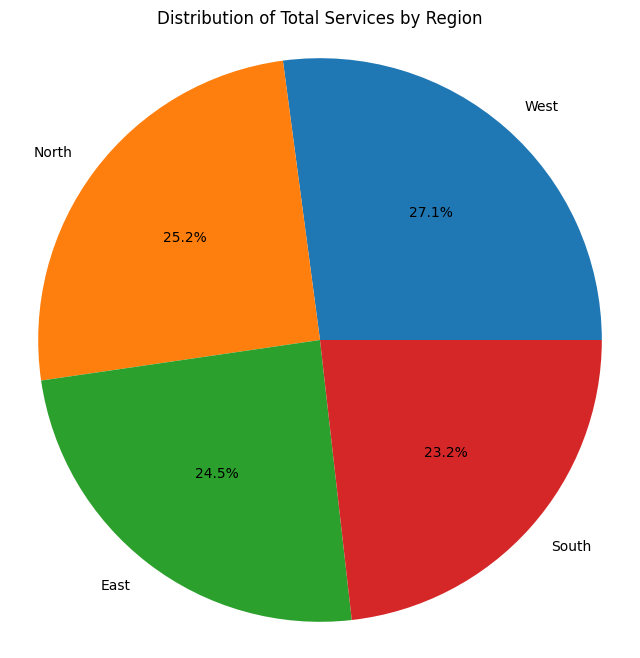

In [ ]:
# Pie chart for total services by region
import matplotlib.pyplot as plt

# Assuming 'total_services_by_region' is a pandas Series with region names as index and service counts as values
plt.figure(figsize=(8, 8))  # Set the figure size to 8x8
plt.pie(
    total_services_by_region,  # Data for the pie chart
    labels=total_services_by_region.index,  # Labels for each slice
    autopct='%1.1f%%'  # Display percentage values with 1 decimal place
)
plt.title('Distribution of Total Services by Region')  # Title of the chart
plt.axis('equal')  # Ensures the pie chart is circular
plt.savefig('services_distribution_by_region.png')  # Save the chart as an image file
plt.show()  # Display the chart

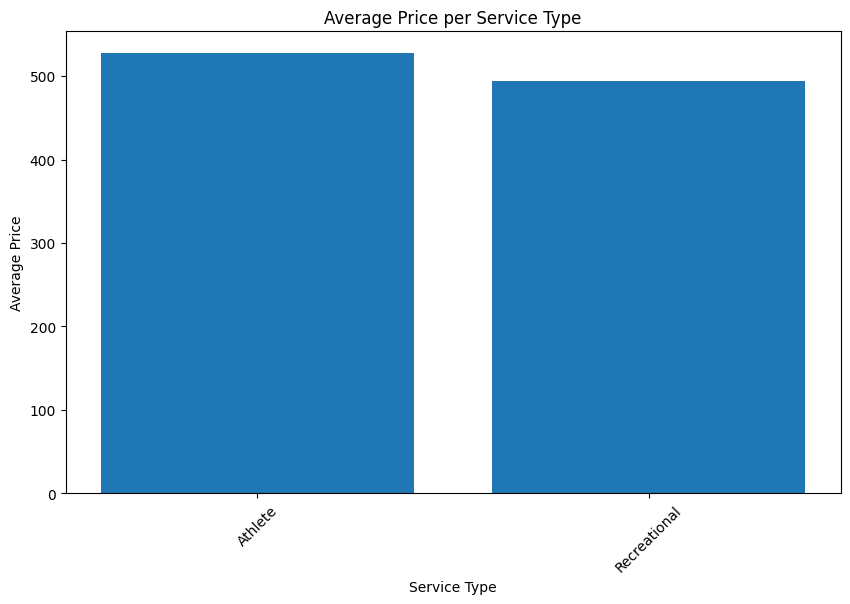

In [ ]:
# Bar plot of average price per service type
plt.figure(figsize=(10, 6))
plt.bar(average_price_per_service.index, average_price_per_service.values)
plt.title('Average Price per Service Type')
plt.xlabel('Service Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.savefig('average_price_per_service.png')  # Save the figure
plt.show()

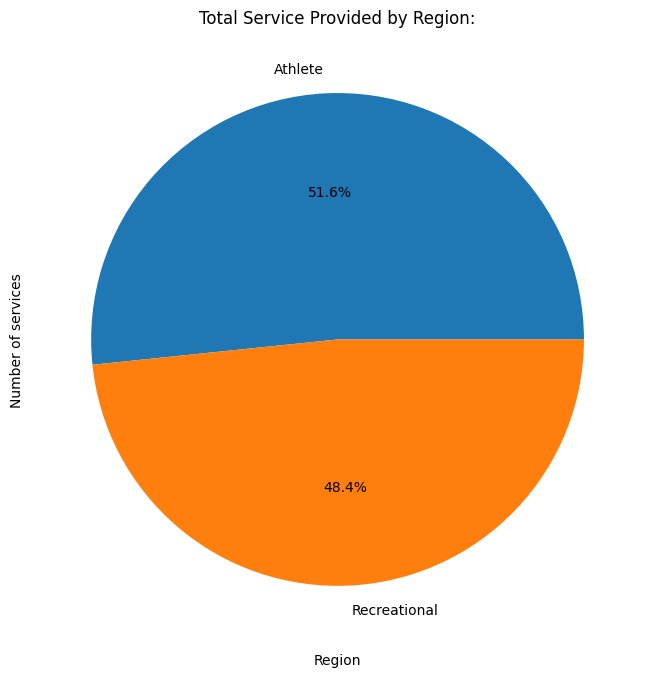

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(
    average_price_per_service,
    labels=average_price_per_service.index,
    autopct='%1.1f%%'
)
plt.title("Total Service Provided by Region:")
plt.xlabel("Region")
plt.ylabel("Number of services")
plt.xticks(rotation=45)
plt.savefig("total_services_by_region.png")
plt.show()

In [ ]:
#save output to a file
with open('analysis_output.txt','w') as f:
  f.writelines(output)